In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
df=pd.read_csv('/content/drive/MyDrive/1 Belajar/dicoding/Pengembangan Machine Learning/news_classification.csv')
df.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


## Class Index
1-World
2-Sports
3-Business
4-Sci/Tech

In [7]:
df['cat'] = df['Class Index'].map({1:'World',2:'Sports',3:'Business',4:'Sci/Tech'})
df.head()

,Class Index,Title,Description,cat
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...,Business
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",Sci/Tech
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,Sci/Tech
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,Sci/Tech
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,Sci/Tech


In [8]:
category = pd.get_dummies(df.cat)
df = df.drop(columns='Class Index')
df_new = pd.concat([df, category], axis=1)
df_new = df_new.drop(columns='cat')
df_new.head(10)

,Title,Description,Business,Sci/Tech,Sports,World
0,Fears for T N pension after talks,Unions representing workers at Turner Newall...,1,0,0,0
1,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o...",0,1,0,0
2,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...,0,1,0,0
3,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...,0,1,0,0
4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...,0,1,0,0
5,Open Letter Against British Copyright Indoctri...,The British Department for Education and Skill...,0,1,0,0
6,Loosing the War on Terrorism,"\\""Sven Jaschan, self-confessed author of the ...",0,1,0,0
7,"FOAFKey: FOAF, PGP, Key Distribution, and Bloo...",\\FOAF/LOAF and bloom filters have a lot of i...,0,1,0,0
8,E-mail scam targets police chief,"Wiltshire Police warns about ""phishing"" after ...",0,1,0,0
9,"Card fraud unit nets 36,000 cards","In its first two years, the UK's dedicated car...",0,1,0,0


In [9]:
x = df_new.Title.values + '' + df.Description.values
y = df_new[['Business','Sci/Tech','Sports','World']].values

In [10]:
# Split data into training and validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [11]:
tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./[\]^_`{|}~:;=<>@ ')
tokenizer.fit_on_texts(x_train) 
tokenizer.fit_on_texts(x_test)
 
seq_train = tokenizer.texts_to_sequences(x_train)
seq_test = tokenizer.texts_to_sequences(x_test)
 
padded_train = pad_sequences(seq_train) 
padded_test = pad_sequences(seq_test)

In [12]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy',)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          320000    
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 435,844
Trainable params: 435,844
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Create class for callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%")
callbacks = myCallback()

In [14]:
history = model.fit(padded_train, y_train, epochs=30, 
                    validation_data=(padded_test, y_test), verbose=2, callbacks=[callbacks], validation_steps=30)

Epoch 1/30
190/190 - 33s - loss: 1.0300 - accuracy: 0.5199 - val_loss: 0.7422 - val_accuracy: 0.7125 - 33s/epoch - 175ms/step
Epoch 2/30
190/190 - 31s - loss: 0.4577 - accuracy: 0.8470 - val_loss: 0.4298 - val_accuracy: 0.8605 - 31s/epoch - 165ms/step
Epoch 3/30
190/190 - 28s - loss: 0.2564 - accuracy: 0.9204 - val_loss: 0.4969 - val_accuracy: 0.8441 - 28s/epoch - 148ms/step
Epoch 4/30
190/190 - 28s - loss: 0.1535 - accuracy: 0.9563 - val_loss: 0.5534 - val_accuracy: 0.8257 - 28s/epoch - 147ms/step
Epoch 5/30
190/190 - 28s - loss: 0.0937 - accuracy: 0.9753 - val_loss: 0.6928 - val_accuracy: 0.8171 - 28s/epoch - 150ms/step
Epoch 6/30
190/190 - 28s - loss: 0.0761 - accuracy: 0.9781 - val_loss: 0.7455 - val_accuracy: 0.8283 - 28s/epoch - 147ms/step
Epoch 7/30
190/190 - 28s - loss: 0.0507 - accuracy: 0.9855 - val_loss: 0.9144 - val_accuracy: 0.8303 - 28s/epoch - 147ms/step
Epoch 8/30
190/190 - 28s - loss: 0.0334 - accuracy: 0.9929 - val_loss: 0.9948 - val_accuracy: 0.8197 - 28s/epoch - 148

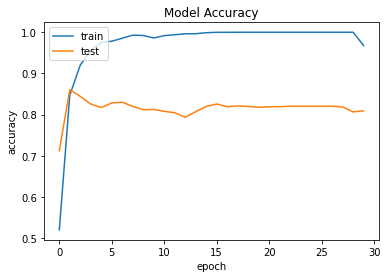

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

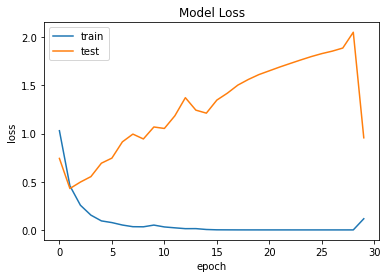

In [16]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()